# Python Project : ObesityDataSet_raw_and_data_sinthetic

### Quentin Berthault & Aref Bitar  DIA 2

## Imports librairies

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


##### install if it's necessary 

In [85]:
#pip install displot

## Import data

In [86]:
data=pd.read_csv('https://github.com/Tintintin1234/Projet-Python-Data-Analyse/blob/b7c48827d8801d2fcb6ddb900a7682c7ef093075/ObesityDataSet_raw_and_data_sinthetic.csv?raw=true')
#data=pd.read_csv('C:/Users/quent/Desktop/Projet Data Python/ObesityDataSet_raw_and_data_sinthetic.csv')

df=data.copy()

## Rename columns with more explicit name

In [87]:
data.columns = ['Gender', 'Age', 'Height', 'Weight', 'family history with overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

In [88]:
print(data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family history with overweight',
       'Frequent consumption of high caloric food',
       'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of food between meals', 'Smoke',
       'Consumption of water daily', 'Calories consumption monitoring',
       'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity'],
      dtype='object')


## View of some characteristic about data

In [89]:
data.head()

,Gender,Age,Height,Weight,family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [90]:
print(data.shape)

(2111, 17)


In [91]:
data.describe()

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [92]:
data.dtypes

Gender                                        object
Age                                          float64
Height                                       float64
Weight                                       float64
family history with overweight                object
Frequent consumption of high caloric food     object
Frequency of consumption of vegetables       float64
Number of main meals                         float64
Consumption of food between meals             object
Smoke                                         object
Consumption of water daily                   float64
Calories consumption monitoring               object
Physical activity frequency                  float64
Time using technology devices                float64
Consumption of alcohol                        object
Transportation used                           object
Obesity                                       object
dtype: object

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   family history with overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   float64
 7   Number of main meals                       2111 non-null   float64
 8   Consumption of food between meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of water dai

## Check for NA & null :

In [94]:
print("Numbers of NA by columns : \n")
data.isna().sum()

Numbers of NA by columns : 



Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
family history with overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64

In [95]:
print("Numbers of null by columns : \n")
data.isna().sum()

Numbers of null by columns : 



Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
family history with overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64

New variables :

In [96]:
homme=data[data['Gender']=='Male']
femme=data[data['Gender']=='Female']


insufficient=data[data['Obesity']== 'Insufficient_Weight']
normal=data[data['Obesity']== 'Normal_Weight']
overweightI=data[data['Obesity']== 'Overweight_Level_I']
overweightII=data[data['Obesity']== 'Overweight_Level_II']
obesityI=data[data['Obesity']== 'Obesity_Type_I']
obesityII=data[data['Obesity']== 'Obesity_Type_II']
obesityIII=data[data['Obesity']== 'Obesity_Type_III']


## Data Visualization 

C:\Users\quent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\quent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Homme and Femme Weight/Height')

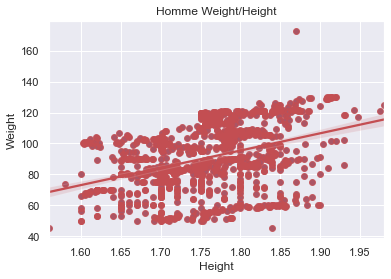

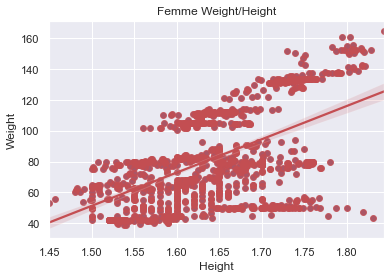

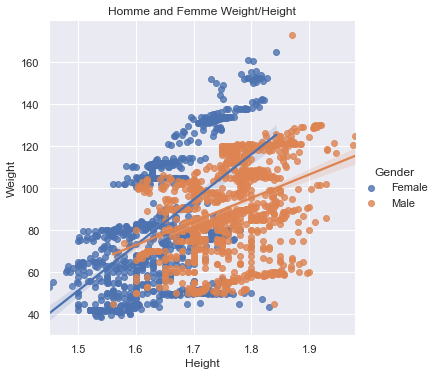

In [97]:
ax1 = homme.plot.scatter(x='Height',y='Weight', color='b')
sns.regplot(homme.Height, homme.Weight, color='r')
plt.title("Homme Weight/Height")

ax2= femme.plot.scatter(x='Height',y='Weight')
sns.regplot(femme.Height, femme.Weight, color='r')
plt.title("Femme Weight/Height")

ax3= sns.lmplot(x="Height", y="Weight", hue="Gender", data=df)
ax3.set_axis_labels("Height", "Weight")
plt.title("Homme and Femme Weight/Height")


### Boxplot 

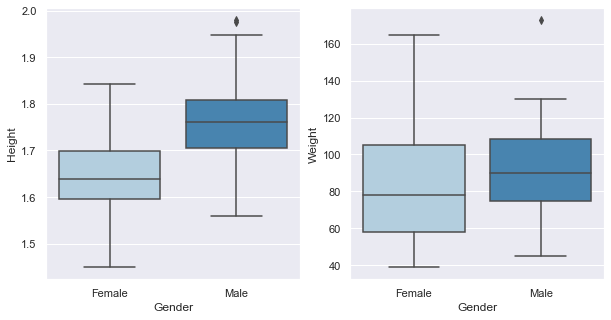

In [98]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', palette="Blues", data=data)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight',palette="Blues", data=data)

## Some visualization of quantitative information 

In [99]:
data.select_dtypes('double')

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


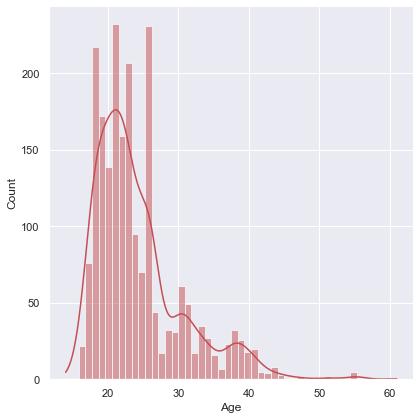

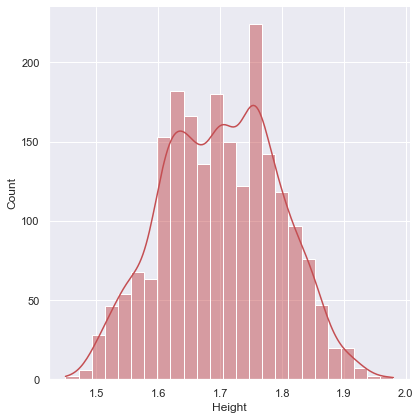

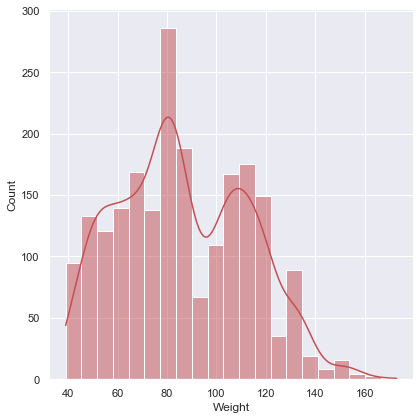

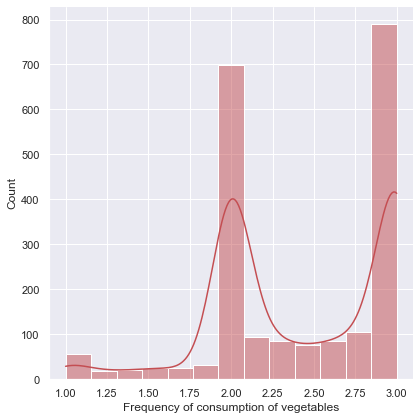

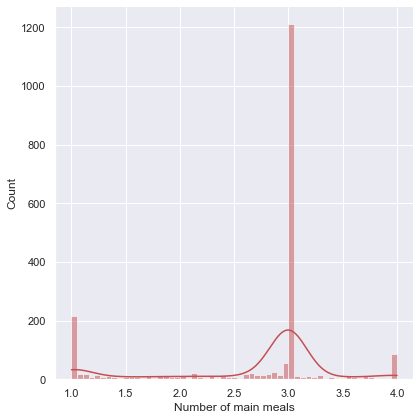

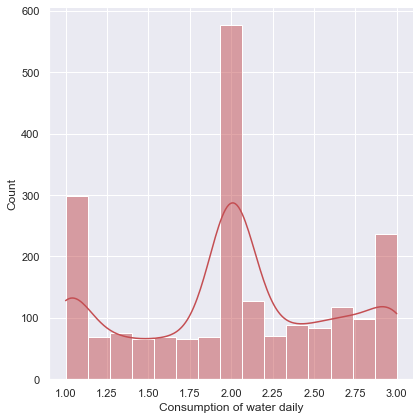

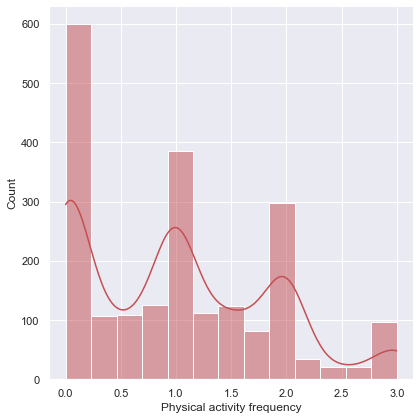

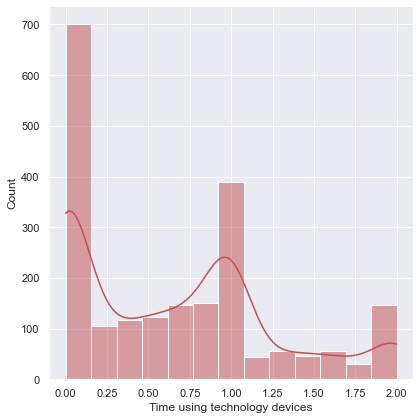

In [100]:
for i in data.select_dtypes('double'):
    ax=sns.displot(data[i], kind="hist", kde=True,  height=6, color='r')

## Some visualization of qualitative information 

In [101]:
data.select_dtypes('object')

,Gender,family history with overweight,Frequent consumption of high caloric food,Consumption of food between meals,Smoke,Calories consumption monitoring,Consumption of alcohol,Transportation used,Obesity
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [102]:
for i in data.select_dtypes('object'):
    print(f'{i: <45} {data[i].unique()}')

Gender                                        ['Female' 'Male']
family history with overweight                ['yes' 'no']
Frequent consumption of high caloric food     ['no' 'yes']
Consumption of food between meals             ['Sometimes' 'Frequently' 'Always' 'no']
Smoke                                         ['no' 'yes']
Calories consumption monitoring               ['no' 'yes']
Consumption of alcohol                        ['no' 'Sometimes' 'Frequently' 'Always']
Transportation used                           ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Obesity                                       ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


### barplot

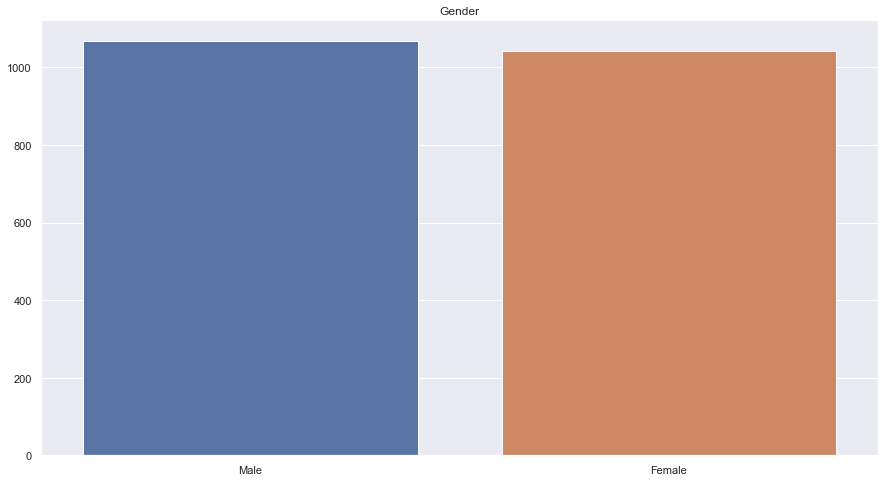

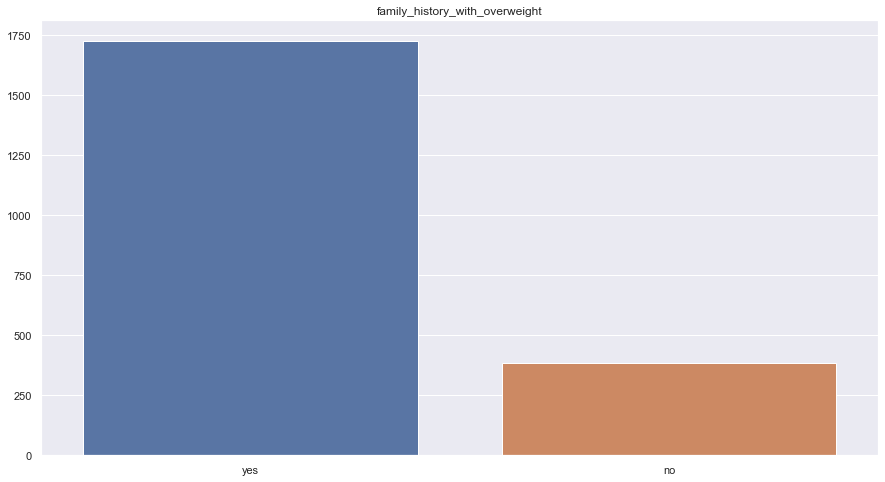

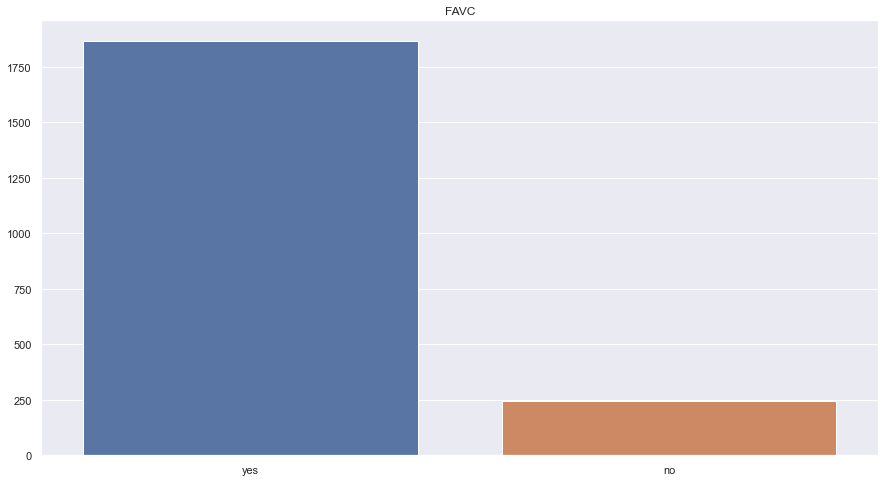

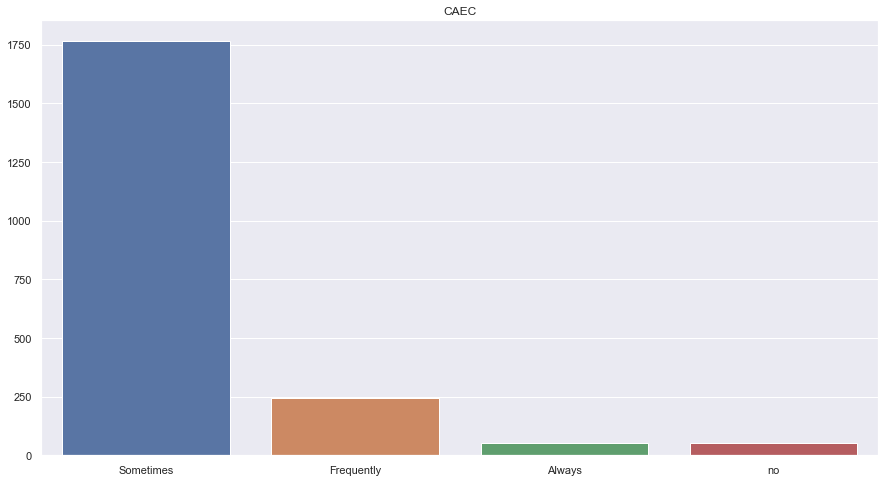

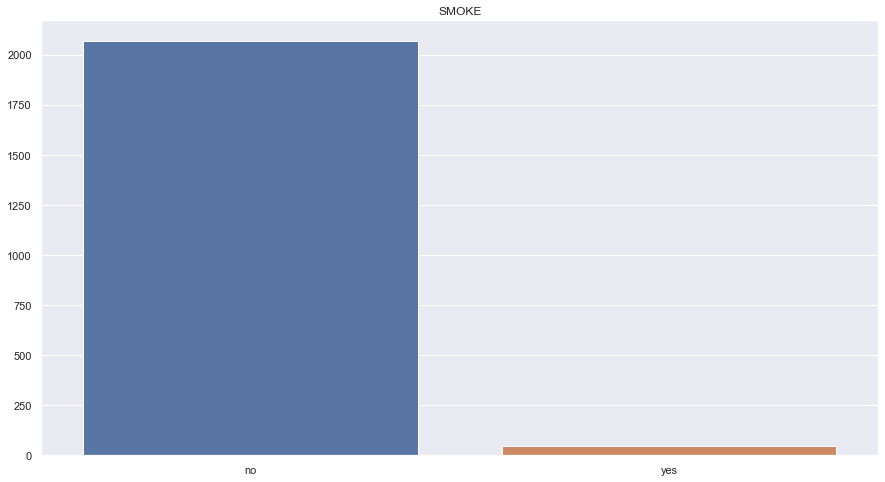

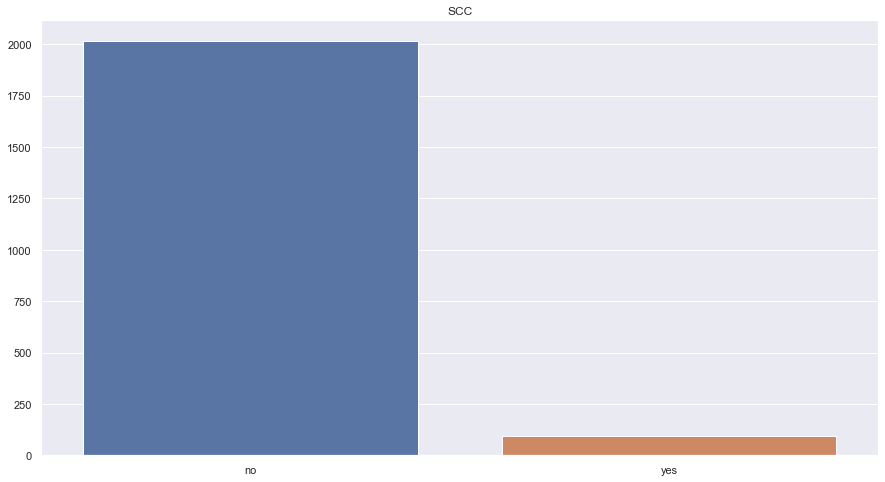

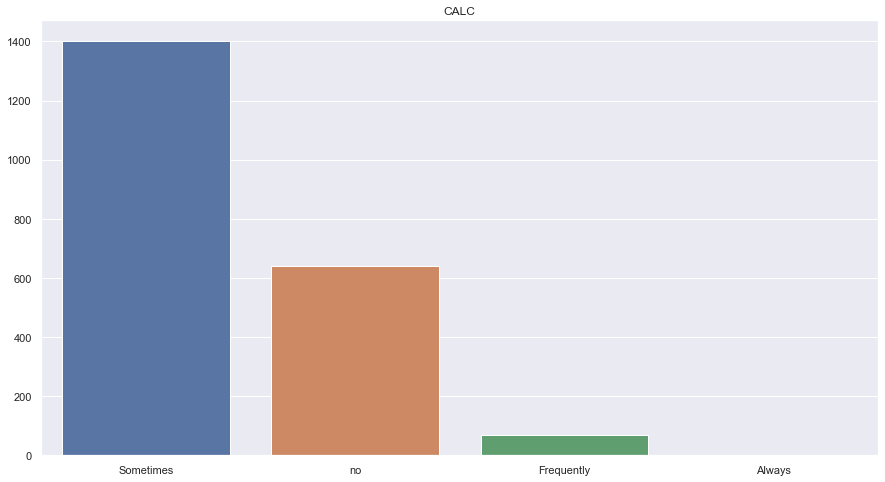

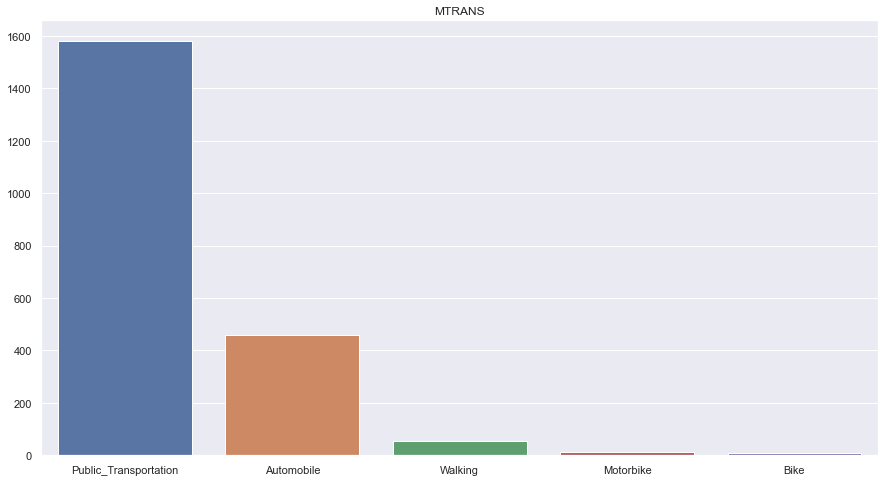

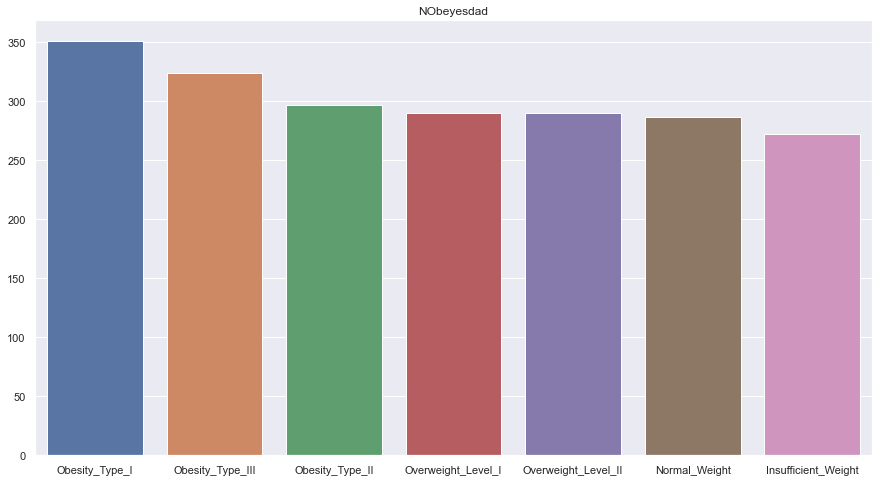

In [103]:
for i in df.select_dtypes('object'):    
    plt.figure(figsize=(15,8))
    plt.title(i)    
    ax = sns.barplot(x = df[i].value_counts().index.to_list(), y = df[i].value_counts().to_list())    


### plot.pie

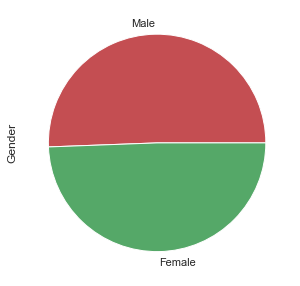

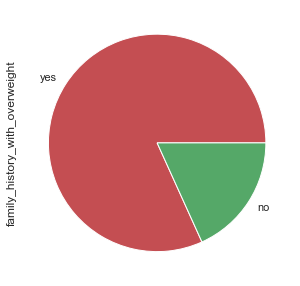

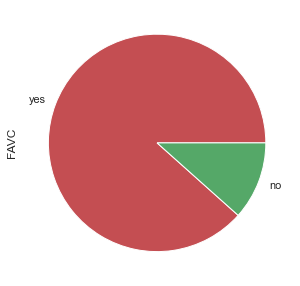

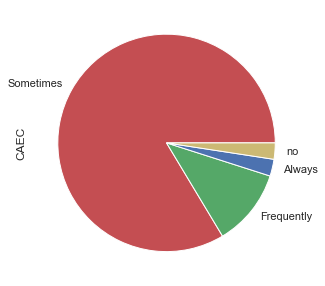

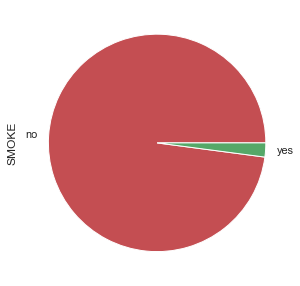

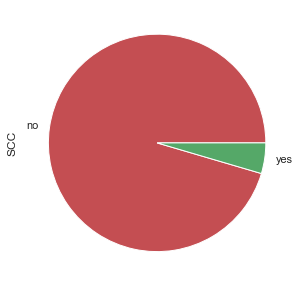

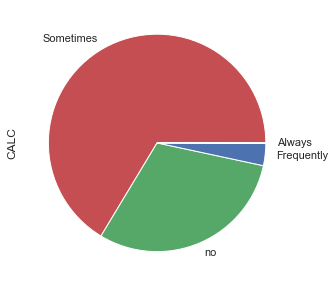

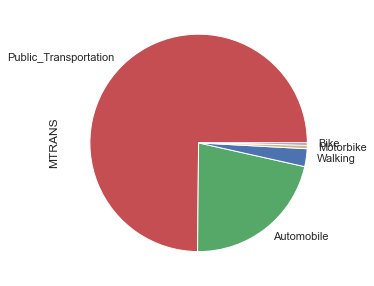

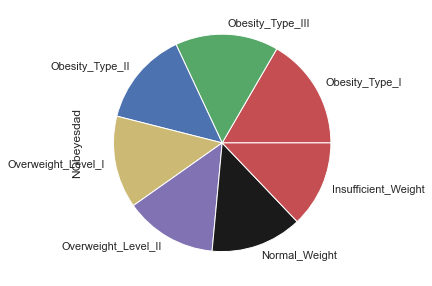

In [104]:
for i in df.select_dtypes('object'):
    fig=plt.figure(figsize=(5,5))
    ax=df[i].value_counts().plot.pie(colors='rgbymk')

## Link between Obesity and quantitative variable 

C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

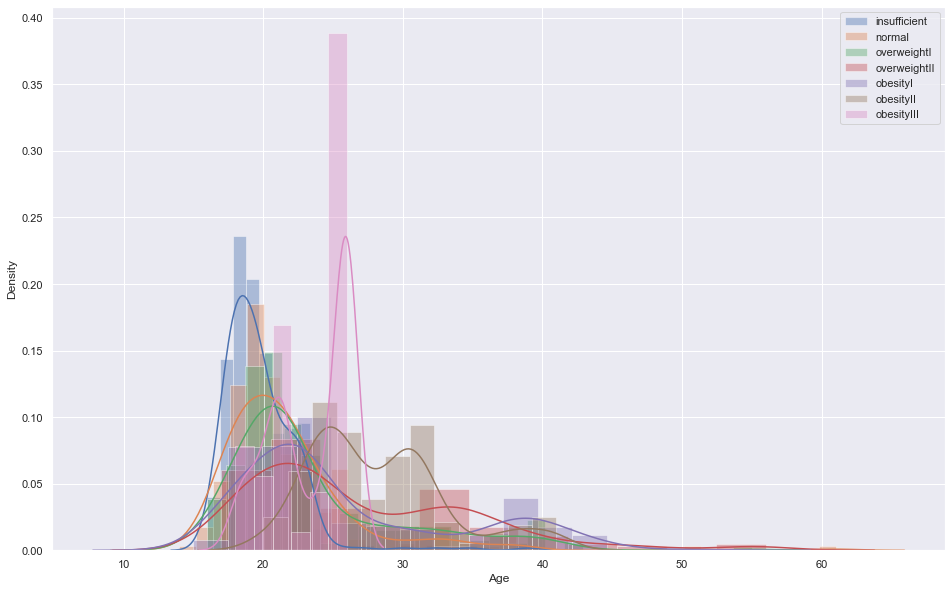

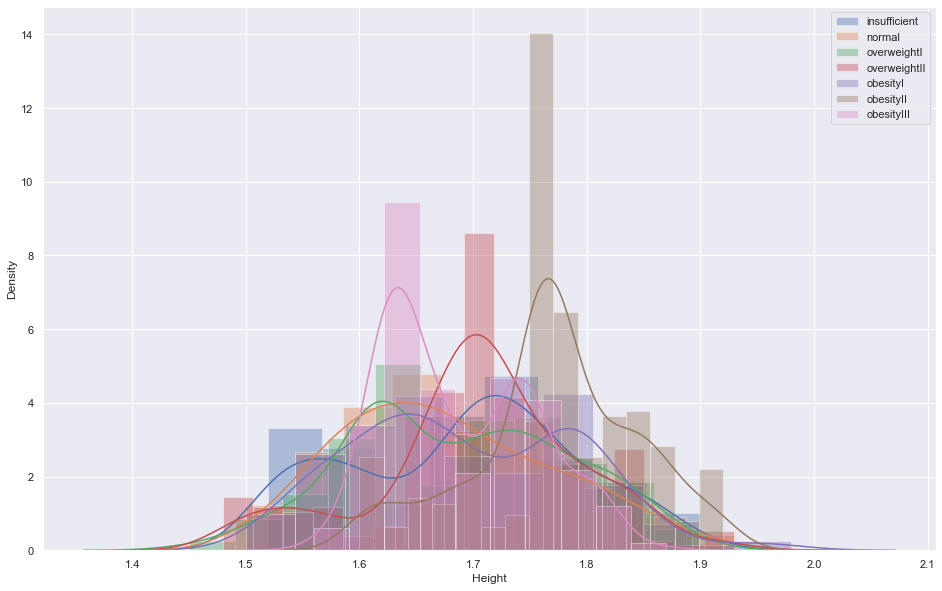

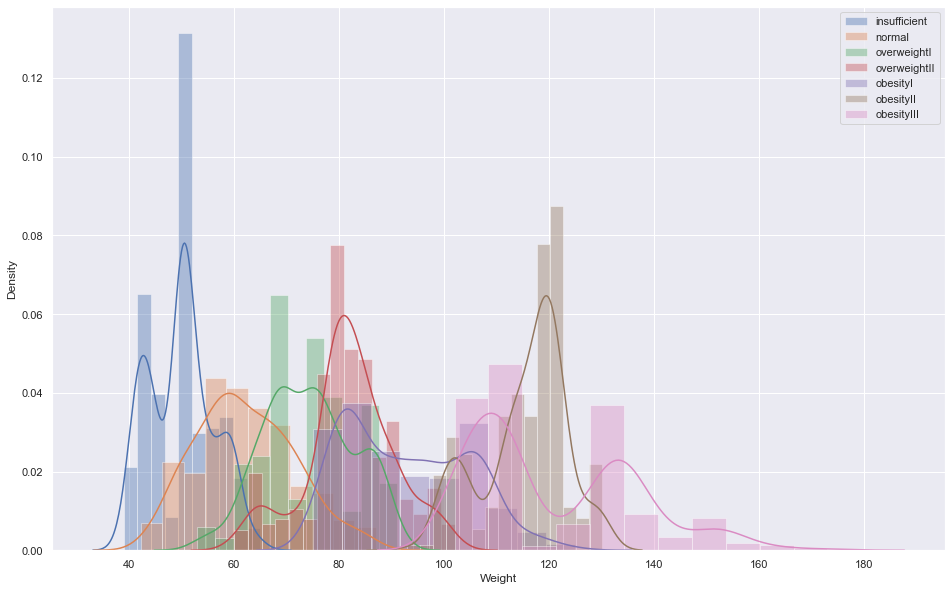

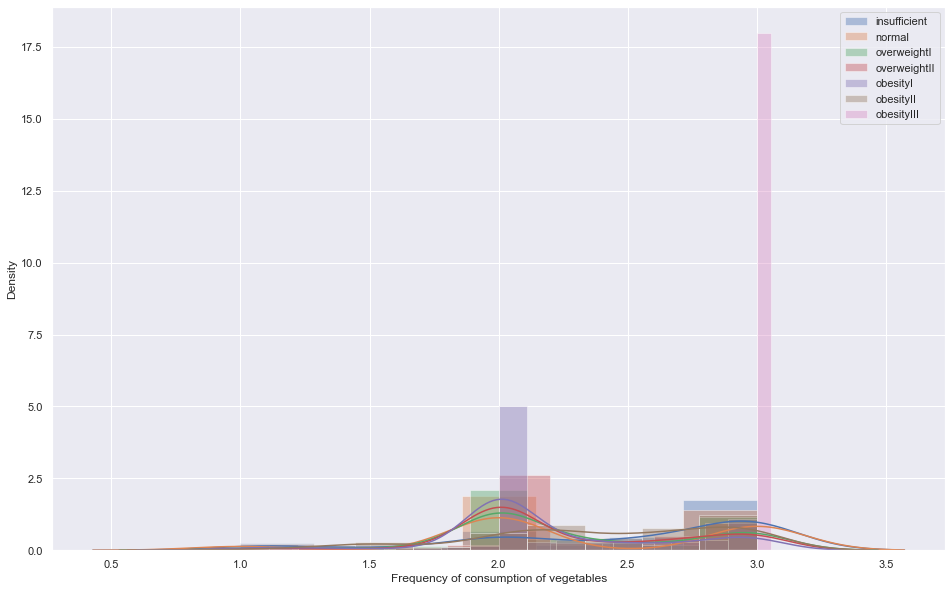

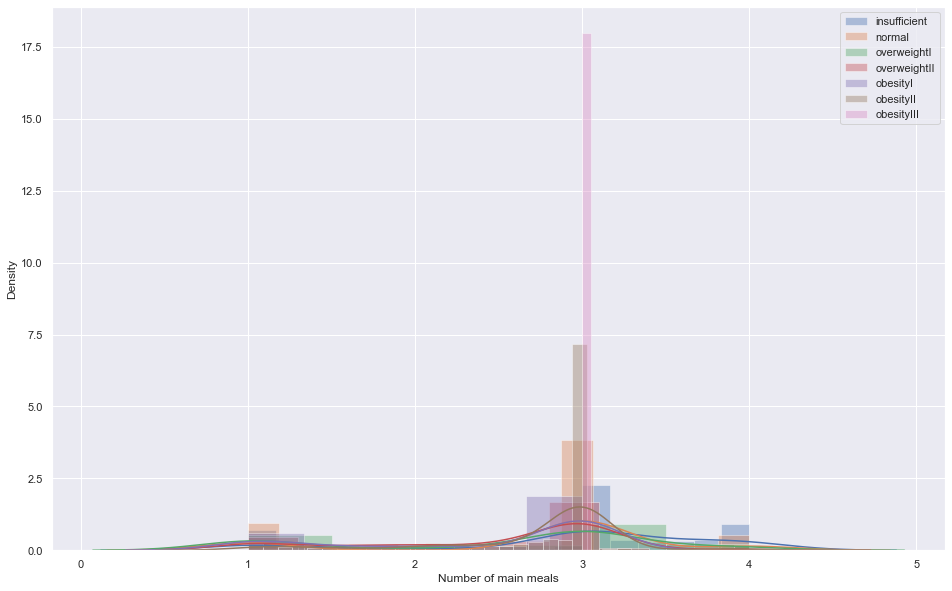

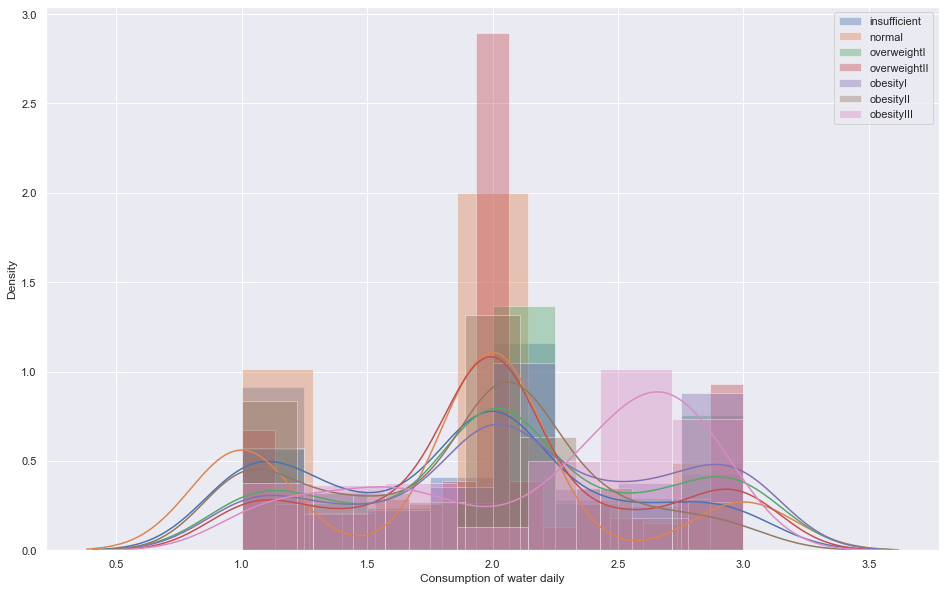

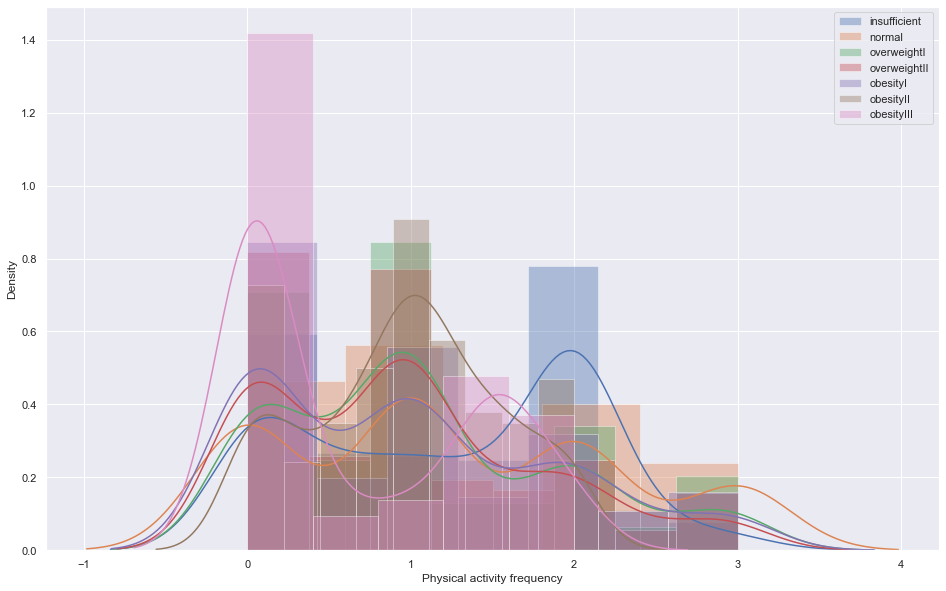

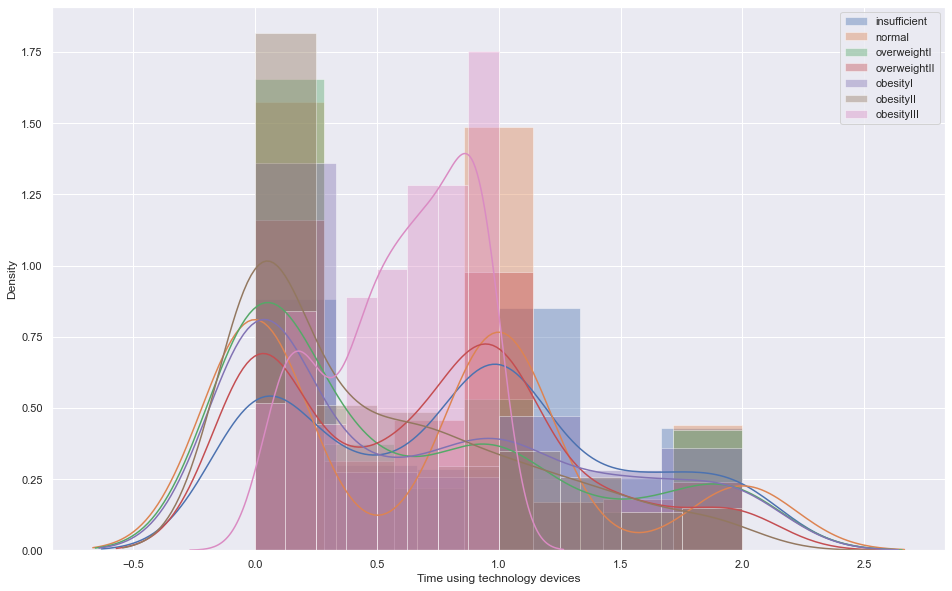

In [105]:
for i in data.select_dtypes('double'):
    plt.figure(figsize=(16,10))
    sns.distplot(insufficient[i], label='insufficient')
    sns.distplot(normal[i], label='normal')
    sns.distplot(overweightI[i], label='overweightI')
    sns.distplot(overweightII[i], label='overweightII')
    sns.distplot(obesityI[i], label='obesityI')
    sns.distplot(obesityII[i], label='obesityII')
    sns.distplot(obesityIII[i], label='obesityIII')
    plt.legend()

In [106]:
insufficient.describe()
normal.describe()
overweightI.describe()
overweightII.describe()
obesityI.describe()
obesityII.describe()
obesityIII.describe()

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
count,324.000000,324.000000,324.000000,324.0,324.0,324.000000,324.000000,324.000000
mean,23.495554,1.687559,120.941114,3.0,3.0,2.208493,0.664817,0.604623
std,2.764324,0.065263,15.532225,0.0,0.0,0.603782,0.732864,0.281852
min,18.000000,1.560000,102.000000,3.0,3.0,1.000000,0.000000,0.000000
25%,21.020867,1.630878,109.491834,3.0,3.0,1.665423,0.000000,0.413031
50%,25.369387,1.668995,112.049308,3.0,3.0,2.431036,0.222654,0.656856
75%,26.000000,1.743771,133.502780,3.0,3.0,2.692467,1.461248,0.853701
max,26.000000,1.870000,173.000000,3.0,3.0,3.000000,2.000000,1.000000


# Machine Learning 

### Split of the dataset in Train and Test

In [107]:
x_train, x_test, y_train, y_test = train_test_split(data[data.columns[0:-1]], data['Obesity'], test_size=0.25, random_state=42)

In [108]:
x_train

,Gender,Age,Height,Weight,family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used
1080,Female,28.977792,1.700000,78.000000,yes,yes,3.000000,3.000000,Sometimes,no,1.507638,no,1.824340,1.000000,Frequently,Automobile
1204,Female,35.432059,1.663178,80.135167,yes,yes,2.000000,3.000000,Sometimes,no,1.992548,no,0.039207,1.528714,no,Automobile
1737,Male,25.659092,1.848420,117.631707,yes,yes,2.128574,3.000000,Sometimes,no,2.531984,no,1.003294,0.026575,Sometimes,Public_Transportation
1548,Male,30.628650,1.766975,118.363376,yes,yes,2.964319,3.000000,Sometimes,no,2.377257,no,0.614959,1.875023,Sometimes,Automobile
2046,Female,25.895546,1.626179,110.074019,yes,yes,3.000000,3.000000,Sometimes,no,1.967707,no,0.014370,0.434073,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Male,32.290160,1.754956,120.098812,yes,yes,2.967300,3.000000,Sometimes,no,2.530035,no,0.955317,1.339232,Sometimes,Automobile
1095,Male,23.000000,1.718981,81.669950,yes,yes,2.000000,1.729553,Sometimes,no,1.400247,no,0.887923,1.011983,Sometimes,Public_Transportation
1130,Female,22.989846,1.650000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.146919,2.000000,no,Public_Transportation
1294,Female,23.000000,1.628168,84.497980,yes,yes,2.058687,2.962004,Sometimes,no,2.010596,no,0.851059,0.630866,no,Public_Transportation


In [109]:
y_test

544     Insufficient_Weight
1987       Obesity_Type_III
420     Insufficient_Weight
527     Insufficient_Weight
196           Normal_Weight
               ...         
331           Normal_Weight
194          Obesity_Type_I
322     Insufficient_Weight
266     Insufficient_Weight
1567        Obesity_Type_II
Name: Obesity, Length: 528, dtype: object

### Change qualitative data in quantitative 

In [110]:
dic={'yes':1, 'no':0,
            'Female':0,
            'Male':1,
            'Sometimes':0,
            'Frequently':1,
            'Always':2,
            'Walking':0,
            'Automobile':1,
            'Motorbike':2,
            'Bike':3, 
            'Public_Transportation':4,             
            'Insufficient_Weight':0,
            'Normal_Weight':1 ,
            'Overweight_Level_I':2 ,
            'Overweight_Level_II':3,
            'Obesity_Type_I':4,            
            'Obesity_Type_II':5,
            'Obesity_Type_III':6
           }


   

In [111]:
def qual_to_quant(data):
    for i in data.select_dtypes('object').columns:
        data.loc[:, i] = data[i].map(dic)    
    return data
    

In [112]:
x_train, x_test, y_train, y_test = train_test_split(data[data.columns[0:-1]], data['Obesity'], test_size=0.25, random_state=42)

In [113]:
x_train

,Gender,Age,Height,Weight,family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used
1080,Female,28.977792,1.700000,78.000000,yes,yes,3.000000,3.000000,Sometimes,no,1.507638,no,1.824340,1.000000,Frequently,Automobile
1204,Female,35.432059,1.663178,80.135167,yes,yes,2.000000,3.000000,Sometimes,no,1.992548,no,0.039207,1.528714,no,Automobile
1737,Male,25.659092,1.848420,117.631707,yes,yes,2.128574,3.000000,Sometimes,no,2.531984,no,1.003294,0.026575,Sometimes,Public_Transportation
1548,Male,30.628650,1.766975,118.363376,yes,yes,2.964319,3.000000,Sometimes,no,2.377257,no,0.614959,1.875023,Sometimes,Automobile
2046,Female,25.895546,1.626179,110.074019,yes,yes,3.000000,3.000000,Sometimes,no,1.967707,no,0.014370,0.434073,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Male,32.290160,1.754956,120.098812,yes,yes,2.967300,3.000000,Sometimes,no,2.530035,no,0.955317,1.339232,Sometimes,Automobile
1095,Male,23.000000,1.718981,81.669950,yes,yes,2.000000,1.729553,Sometimes,no,1.400247,no,0.887923,1.011983,Sometimes,Public_Transportation
1130,Female,22.989846,1.650000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.146919,2.000000,no,Public_Transportation
1294,Female,23.000000,1.628168,84.497980,yes,yes,2.058687,2.962004,Sometimes,no,2.010596,no,0.851059,0.630866,no,Public_Transportation


In [114]:
dtest=qual_to_quant(data)
dtest

,Gender,Age,Height,Weight,family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,0,2.000000,0,0.000000,1.000000,0,4,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,0,1,3.000000,1,3.000000,0.000000,0,4,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,0,2.000000,1.000000,1,4,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,1,0,2
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,0,1.728139,0,1.676269,0.906247,0,4,6
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,0,2.005130,0,1.341390,0.599270,0,4,6
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,0,2.054193,0,1.414209,0.646288,0,4,6
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,0,2.852339,0,1.139107,0.586035,0,4,6


In [150]:
x_train, x_test, y_train, y_test = train_test_split(dtest[dtest.columns[0:-1]], dtest['Obesity'], test_size=0.25, random_state=42)

In [116]:
x_train

,Gender,Age,Height,Weight,family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used
1080,0,28.977792,1.700000,78.000000,1,1,3.000000,3.000000,0,0,1.507638,0,1.824340,1.000000,1,1
1204,0,35.432059,1.663178,80.135167,1,1,2.000000,3.000000,0,0,1.992548,0,0.039207,1.528714,0,1
1737,1,25.659092,1.848420,117.631707,1,1,2.128574,3.000000,0,0,2.531984,0,1.003294,0.026575,0,4
1548,1,30.628650,1.766975,118.363376,1,1,2.964319,3.000000,0,0,2.377257,0,0.614959,1.875023,0,1
2046,0,25.895546,1.626179,110.074019,1,1,3.000000,3.000000,0,0,1.967707,0,0.014370,0.434073,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,32.290160,1.754956,120.098812,1,1,2.967300,3.000000,0,0,2.530035,0,0.955317,1.339232,0,1
1095,1,23.000000,1.718981,81.669950,1,1,2.000000,1.729553,0,0,1.400247,0,0.887923,1.011983,0,4
1130,0,22.989846,1.650000,80.000000,1,1,2.000000,3.000000,0,0,2.000000,0,0.146919,2.000000,0,4
1294,0,23.000000,1.628168,84.497980,1,1,2.058687,2.962004,0,0,2.010596,0,0.851059,0.630866,0,4


### Scaling of the data

In [117]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# ML with all parameters

## AdaBoost

In [118]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=1000, random_state=42)
adab=clf.fit(x_train, y_train)

ypred_model_ada=adab.predict(x_test)


acc_model_ada=accuracy_score(ypred_model_ada, y_test)
print("Accuracy of :",acc_model_ada)

Accuracy of : 0.3522727272727273


In [119]:
confusion_matrix(ypred_model_ada, y_test)

array([[66, 40,  4,  1,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 2, 35, 67, 56, 43,  0,  0],
       [ 0,  0,  0,  0,  1,  4,  0],
       [ 0,  0,  0,  6, 50, 71, 79],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [120]:
print(classification_report(ypred_model_ada, y_test))

              precision    recall  f1-score   support

           0       0.97      0.59      0.74       111
           1       0.04      1.00      0.07         3
           2       0.94      0.33      0.49       203
           3       0.00      0.00      0.00         5
           4       0.53      0.24      0.33       206
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.35       528
   macro avg       0.35      0.31      0.23       528
weighted avg       0.77      0.35      0.47       528



C:\Users\quent\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

model_knn = knn.fit(x_train, y_train)

ypred_model_knn=model_knn.predict(x_test)

acc_model_knn=accuracy_score(ypred_model_knn, y_test)
print("Accuracy of :",acc_model_knn)

Accuracy of : 0.7708333333333334


In [122]:
confusion_matrix(ypred_model_knn, y_test)

array([[63, 17,  4,  2,  1,  0,  0],
       [ 3, 32, 12,  3,  3,  0,  0],
       [ 1,  5, 45,  6,  2,  0,  0],
       [ 1, 16,  8, 42, 10,  0,  0],
       [ 0,  7,  1,  7, 74,  3,  0],
       [ 0,  1,  1,  2,  4, 72,  0],
       [ 0,  0,  0,  1,  0,  0, 79]], dtype=int64)

In [123]:
print(classification_report(ypred_model_knn, y_test))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        87
           1       0.41      0.60      0.49        53
           2       0.63      0.76      0.69        59
           3       0.67      0.55      0.60        77
           4       0.79      0.80      0.80        92
           5       0.96      0.90      0.93        80
           6       1.00      0.99      0.99        80

    accuracy                           0.77       528
   macro avg       0.77      0.76      0.76       528
weighted avg       0.80      0.77      0.78       528



## Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()

model_LogisticR = LogisticRegression.fit(x_train, y_train)

ypred_model_LogisticR=model_LogisticR.predict(x_test)

acc_model_LogisticR=accuracy_score(ypred_model_LogisticR, y_test)
print("Accuracy of :",acc_model_LogisticR)


Accuracy of : 0.8825757575757576


C:\Users\quent\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
confusion_matrix(ypred_model_LogisticR, y_test)

array([[68, 14,  0,  0,  0,  0,  0],
       [ 0, 51,  6,  0,  0,  0,  0],
       [ 0, 10, 55,  6,  0,  0,  0],
       [ 0,  3, 10, 53,  2,  0,  0],
       [ 0,  0,  0,  4, 86,  0,  0],
       [ 0,  0,  0,  0,  6, 75,  1],
       [ 0,  0,  0,  0,  0,  0, 78]], dtype=int64)

In [126]:
print(classification_report(ypred_model_LogisticR, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        82
           1       0.65      0.89      0.76        57
           2       0.77      0.77      0.77        71
           3       0.84      0.78      0.81        68
           4       0.91      0.96      0.93        90
           5       1.00      0.91      0.96        82
           6       0.99      1.00      0.99        78

    accuracy                           0.88       528
   macro avg       0.88      0.88      0.88       528
weighted avg       0.90      0.88      0.89       528



## DecisionTreeClassifier

In [127]:
model_tree = DecisionTreeClassifier(random_state=42)

In [128]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [129]:
ypred_model_tree=model_tree.predict(x_test)

In [130]:
acc_model_tree=accuracy_score(ypred_model_tree, y_test)
print("Accuracy of :",acc_model_tree)

Accuracy of : 0.9128787878787878


In [131]:
confusion_matrix(ypred_model_tree, y_test)

array([[64,  7,  0,  0,  0,  0,  0],
       [ 4, 65,  7,  0,  0,  0,  0],
       [ 0,  6, 63,  7,  1,  0,  0],
       [ 0,  0,  1, 55,  3,  0,  0],
       [ 0,  0,  0,  1, 87,  5,  1],
       [ 0,  0,  0,  0,  3, 70,  0],
       [ 0,  0,  0,  0,  0,  0, 78]], dtype=int64)

In [132]:
print(classification_report(ypred_model_tree, y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        71
           1       0.83      0.86      0.84        76
           2       0.89      0.82      0.85        77
           3       0.87      0.93      0.90        59
           4       0.93      0.93      0.93        94
           5       0.93      0.96      0.95        73
           6       0.99      1.00      0.99        78

    accuracy                           0.91       528
   macro avg       0.91      0.91      0.91       528
weighted avg       0.91      0.91      0.91       528



## Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

model_random_F = randomforest.fit(x_train, y_train)

ypred_model_random_F=model_random_F.predict(x_test)

acc_model_random_F=accuracy_score(ypred_model_random_F, y_test)
print("Accuracy of :",acc_model_random_F)

Accuracy of : 0.9375


In [134]:
confusion_matrix(ypred_model_random_F, y_test)

array([[65,  1,  0,  0,  0,  0,  0],
       [ 3, 72, 10,  1,  1,  0,  0],
       [ 0,  5, 58,  2,  0,  0,  0],
       [ 0,  0,  3, 60,  1,  0,  0],
       [ 0,  0,  0,  0, 89,  2,  0],
       [ 0,  0,  0,  0,  3, 73,  1],
       [ 0,  0,  0,  0,  0,  0, 78]], dtype=int64)

In [135]:
print(classification_report(ypred_model_random_F, y_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       0.92      0.83      0.87        87
           2       0.82      0.89      0.85        65
           3       0.95      0.94      0.94        64
           4       0.95      0.98      0.96        91
           5       0.97      0.95      0.96        77
           6       0.99      1.00      0.99        78

    accuracy                           0.94       528
   macro avg       0.94      0.94      0.94       528
weighted avg       0.94      0.94      0.94       528



### => Best score with random forest

## Correlation Matrix

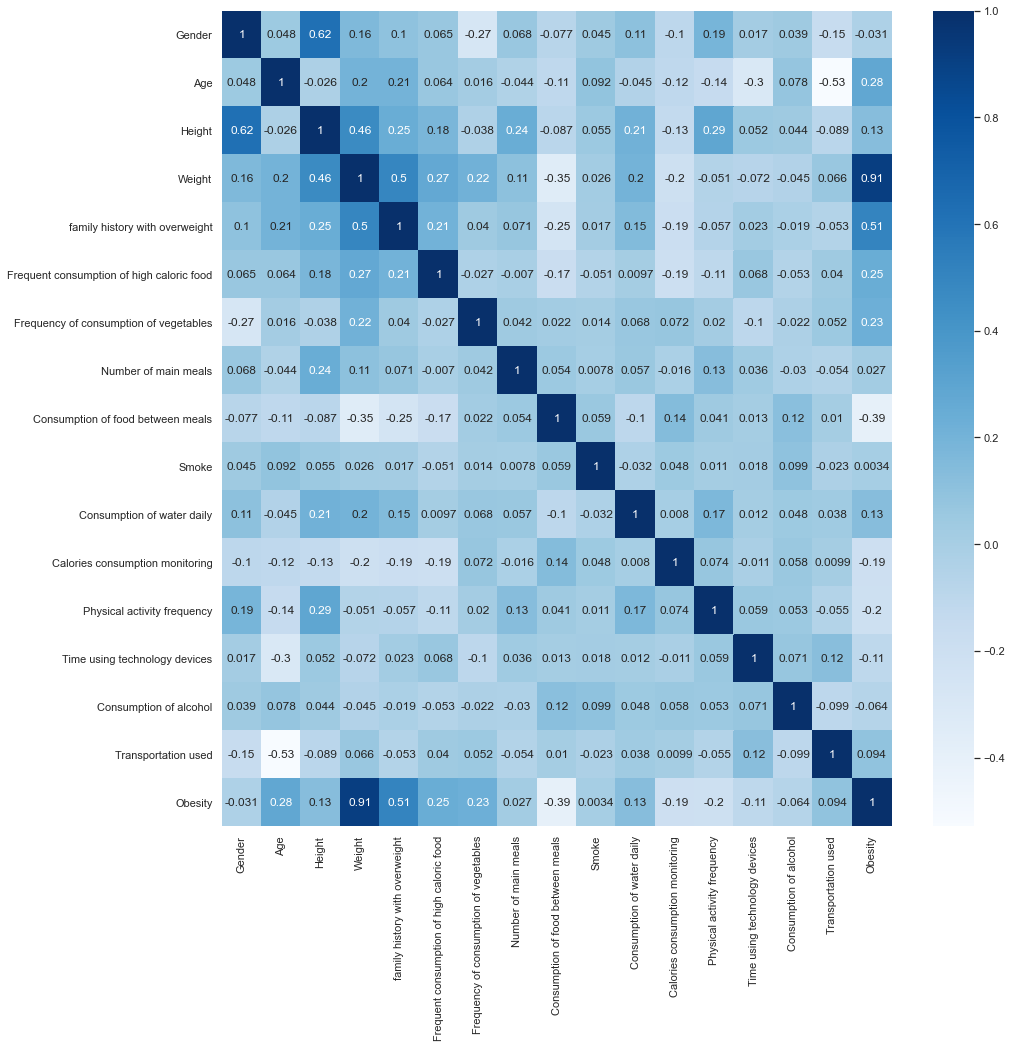

In [136]:
plt.figure(figsize=(15,15))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Blues)


## ML with best parameters

Text(0.5, 1.0, 'Importance of each parameters')

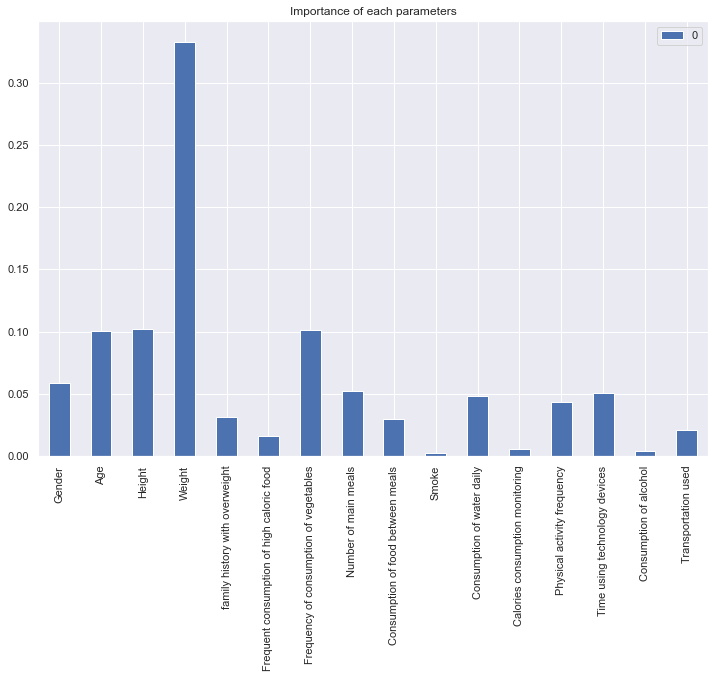

In [151]:
pd.DataFrame(model_random_F.feature_importances_, index=x_train.columns).plot.bar(figsize=(12, 8))
plt.title("Importance of each parameters")



In [138]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(dtest[['Weight','Height','Age', 'family history with overweight' ]], dtest['Obesity'], test_size=0.25, random_state=42)
x_train

array([[-1.0159195 ,  0.69290662, -0.01971309, ...,  0.57241236,
         5.27097568, -1.61808592],
       [-1.0159195 ,  1.68144193, -0.41494799, ...,  1.44681542,
        -0.18258935, -1.61808592],
       [ 0.98432996,  0.18461464,  1.57337702, ..., -1.0374671 ,
        -0.18258935,  0.58434745],
       ...,
       [-1.0159195 , -0.22420698, -0.55639619, ...,  2.22624234,
        -0.18258935,  0.58434745],
       [-1.0159195 , -0.22265179, -0.7907335 , ..., -0.03807252,
        -0.18258935,  0.58434745],
       [ 0.98432996, -0.68213169,  1.24127752, ..., -0.1526234 ,
        -0.18258935,  0.58434745]])

In [77]:
randomforest = RandomForestClassifier()

model_random_F_2 = randomforest.fit(x_train2, y_train2)

ypred_model_random_F_2=model_random_F_2.predict(x_test2)

acc_model_random_F_2=accuracy_score(ypred_model_random_F_2, y_test2)
print("Accuracy of :",acc_model_random_F_2)

Accuracy of : 0.9640151515151515


### Visualization

In [78]:
x=["acc_model_ada","acc_model_knn","acc_model_LogisticR","acc_model_tree","acc_model_random_F","acc_model_random_F_2"]
y=[acc_model_ada,acc_model_knn,acc_model_LogisticR,acc_model_tree,acc_model_random_F,acc_model_random_F_2]

Text(0.5, 1.0, 'Best performance')

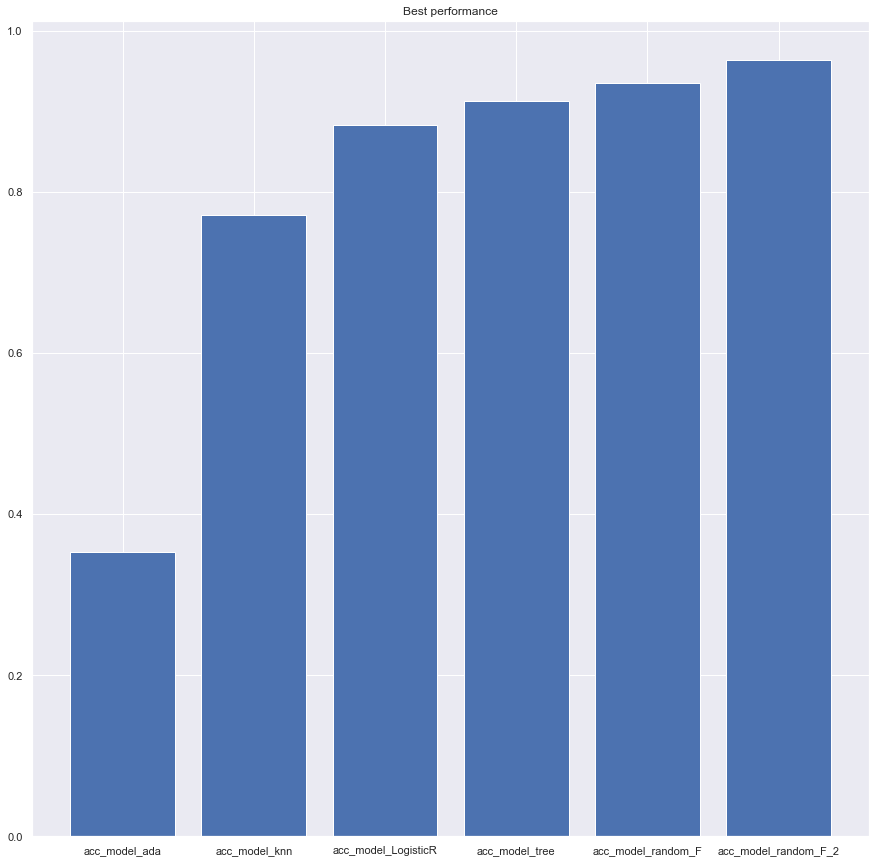

In [79]:
plt.figure(figsize=(15,15))
plt.bar(x,y)
plt.title("Best performance")

## Grid Search

In [80]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

search = GridSearchCV(SVC(), parameters, cv=5)
model_grid=search.fit(x_train, y_train)

In [81]:
ypred_model_grid=model_grid.predict(x_test)

acc_model_grid=accuracy_score(ypred_model_grid, y_test)
print("Accuracy of :",acc_model_grid)

Accuracy of : 0.9431818181818182


## Alternative with IMC

In [162]:
IMC = data["Weight"]/((data["Height"])**2)
data.insert(loc = 2, column='IMC', value=IMC)

In [158]:
data.drop(['Weight', 'Height'], axis=1, inplace=True)

In [159]:
data

,Gender,Age,IMC,family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,0,21.000000,24.386526,1,0,2.0,3.0,0,0,2.000000,0,0.000000,1.000000,0,4,1
1,0,21.000000,24.238227,1,0,3.0,3.0,0,1,3.000000,1,3.000000,0.000000,0,4,1
2,1,23.000000,23.765432,1,0,2.0,3.0,0,0,2.000000,0,2.000000,1.000000,1,4,1
3,1,27.000000,26.851852,0,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,1,0,2
4,1,22.000000,28.342381,0,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,44.901475,1,1,3.0,3.0,0,0,1.728139,0,1.676269,0.906247,0,4,6
2107,0,21.982942,43.741923,1,1,3.0,3.0,0,0,2.005130,0,1.341390,0.599270,0,4,6
2108,0,22.524036,43.543817,1,1,3.0,3.0,0,0,2.054193,0,1.414209,0.646288,0,4,6
2109,0,24.361936,44.071535,1,1,3.0,3.0,0,0,2.852339,0,1.139107,0.586035,0,4,6


In [160]:
x_train, x_test, y_train, y_test = train_test_split(data[data.columns[0:-1]], data['Obesity'], test_size=0.25, random_state=42)

In [161]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

model_random_F = randomforest.fit(x_train, y_train)

ypred_model_random_F=model_random_F.predict(x_test)

acc_model_random_F=accuracy_score(ypred_model_random_F, y_test)
print("Accuracy of :",acc_model_random_F)

Accuracy of : 0.9734848484848485


### Best accuracy !

## Export of the model for later use in Flask

In [365]:
import pickle
pickle.dump(randomforest, open('randomforest.pickle', 'wb'))